 Vitor Emanuel da Silva Rozeno

RA: 211044539

# **Classificação**

# **Dataset: Water Quality and Potability**
*determinar se determinada água com certas características é potável ou não*

## Atributos de entrada:


* (float) **pH**: nível de pH da água
* (float) **Hardness**: "dureza" da água; medida de conteúdos minerais na água
* (float) **Solids**: total de sólidos dissolvidos na água
* (float) **Chloramines**: concentração de cloraminas na água
* (float) **Sulfate**: concentração de sulfato na água
* (float) **Conductivity**: condutividade elétrica da água
* (float) **Organic_carbon**: conteúdo de carbono orgânico na água
* (float) **Trihalomethanes**: concentração de trialometano na água
* (float) **Turbidity**: medida de claridade da água, o quão turva ela está


## Atributo-meta (saída):

* (boolean) **Potality**: se a água é potável

## Motivação:

Se tratando de um problema onde a saída pode ser ou verdadeira ou falsa, pode-se concluir que a melhor abordagem é utilizar um Método de Aprendizado de Máquina para Classificação, onde a máquina ao final classificará uma entrada x como sendo da classe 0 ou da classe 1, isto é, não-potável ou potável.

No âmbito de aplicação, este dataset é interessante por se tratar de um problema importante na sociedade, que é o tratamento e análise da água que utilizamos. Portanto, aplicações em aprendizado de máquina podem ser de grande valia nesse segmento, automatizando processos, por exemplo.



In [183]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [184]:
# Leitura dos dados
data = pd.read_csv('/content/water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Pré-processamento dos dados

In [185]:
# Tratamento dos valores faltantes
imputer = SimpleImputer(strategy='mean') #Estratégia adotada: substituir pela média
data_imp = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
data_imp.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0


In [186]:
# Separação das features e da variável alvo
X = data_imp.drop('Potability', axis=1)  # Features (X), sem coluna de alvo (y)
y = data_imp['Potability']  # Variável alvo (y)
print(X.head())
print(y.head())

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  
0       10.379783        86.990970   2.963135  
1       15.180013        56.329076   4.500656  
2       16.868637        66.420093   3.055934  
3       18.436524       100.341674   4.628771  
4       11.558279        31.997993   4.075075  
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Potability, dtype: float64


In [187]:
#Reescalomento: Normalização Min-Max
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_norm = pd.DataFrame(mms.fit_transform(X), columns=X.columns)
# Valor máximo será 1 e valor mínimo será 0
min, max = X_norm.min(axis=0), X_norm.max(axis=0)
print(min)
print(max)

ph                 0.0
Hardness           0.0
Solids             0.0
Chloramines        0.0
Sulfate            0.0
Conductivity       0.0
Organic_carbon     0.0
Trihalomethanes    0.0
Turbidity          0.0
dtype: float64
ph                 1.0
Hardness           1.0
Solids             1.0
Chloramines        1.0
Sulfate            1.0
Conductivity       1.0
Organic_carbon     1.0
Trihalomethanes    1.0
Turbidity          1.0
dtype: float64


In [188]:
# Divisão dos dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

# Algoritmos de Classificação

In [189]:
# Random Forest
rf = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [190]:
# KNN - K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [191]:
# SVM - Support Vector Machine
svm = SVC(kernel='rbf', C=1)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Avaliação dos resultados

Pode-se observar que o SVM apresenta melhor desempenho/acurácia, mas, de modo geral, os 3 métodos apresentam dificuldade na classificação da água potável, o que é visível nas matrizes de confusão, que apresentam grande quantidade de falsos negativos.

In [192]:
# Função para exibir métricas
def print_metrics(y_test, y_pred, model_name):
    print(f"Resultados para {model_name}:")
    print("Acurácia:", accuracy_score(y_test, y_pred))
    print("F1-Score:", f1_score(y_test, y_pred))
    print("Relatório de Classificação:\n", classification_report(y_test, y_pred))
    print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
    print("-" * 50)

In [193]:
# Avaliação dos resultados para Random Forest
print_metrics(y_test, y_pred_rf, "Random Forest")

Resultados para Random Forest:
Acurácia: 0.6829268292682927
F1-Score: 0.36585365853658536
Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.68      0.94      0.79       412
         1.0       0.71      0.25      0.37       244

    accuracy                           0.68       656
   macro avg       0.70      0.59      0.58       656
weighted avg       0.69      0.68      0.63       656

Matriz de Confusão:
 [[388  24]
 [184  60]]
--------------------------------------------------


In [194]:
# Avaliação dos resultados para KNN
print_metrics(y_test, y_pred_knn, "KNN")

Resultados para KNN:
Acurácia: 0.6509146341463414
F1-Score: 0.18505338078291814
Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.65      0.97      0.78       412
         1.0       0.70      0.11      0.19       244

    accuracy                           0.65       656
   macro avg       0.68      0.54      0.48       656
weighted avg       0.67      0.65      0.56       656

Matriz de Confusão:
 [[401  11]
 [218  26]]
--------------------------------------------------


In [195]:
# Avaliação dos resultados para SVM
print_metrics(y_test, y_pred_svm, "SVM")

Resultados para SVM:
Acurácia: 0.6966463414634146
F1-Score: 0.4059701492537313
Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.69      0.94      0.80       412
         1.0       0.75      0.28      0.41       244

    accuracy                           0.70       656
   macro avg       0.72      0.61      0.60       656
weighted avg       0.71      0.70      0.65       656

Matriz de Confusão:
 [[389  23]
 [176  68]]
--------------------------------------------------


In [196]:
# Visualização da Matriz de Confusão
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.show()

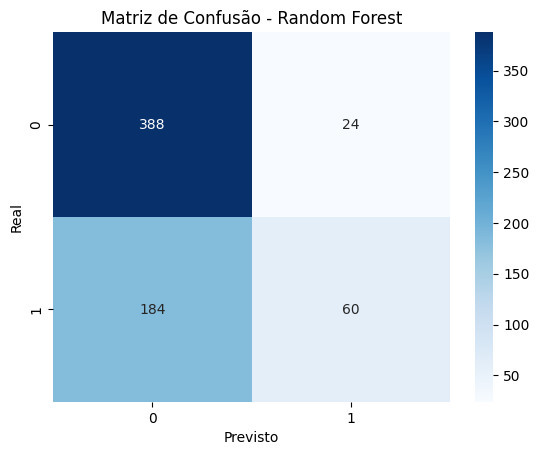

In [197]:
# Plotando as matrizes de confusão
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

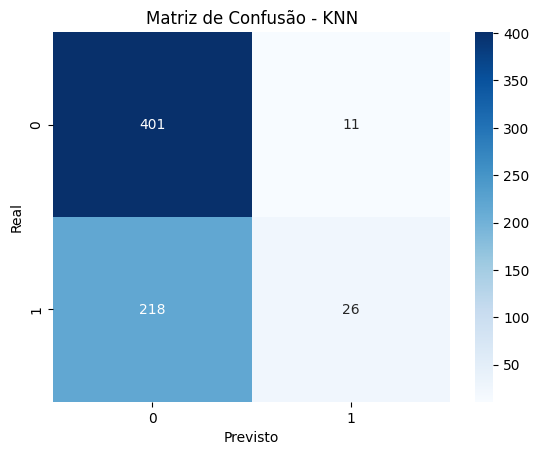

In [198]:
plot_confusion_matrix(y_test, y_pred_knn, "KNN")

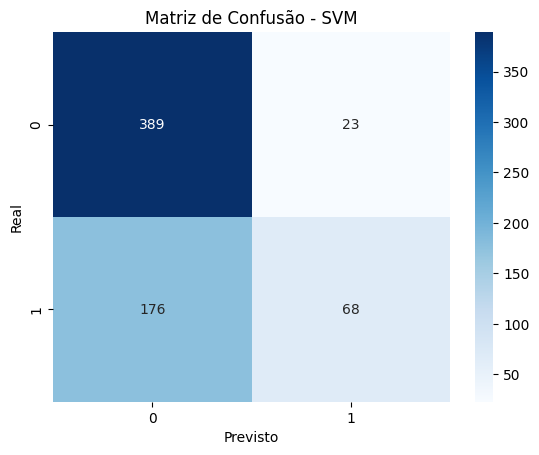

In [199]:
plot_confusion_matrix(y_test, y_pred_svm, "SVM")

O mapa de correlação entre as features demonstra a maior correlação entre as variáveis Solids-Sulfate, Hardness-Sulfate, pH-Solids e Chlormaines-Solids

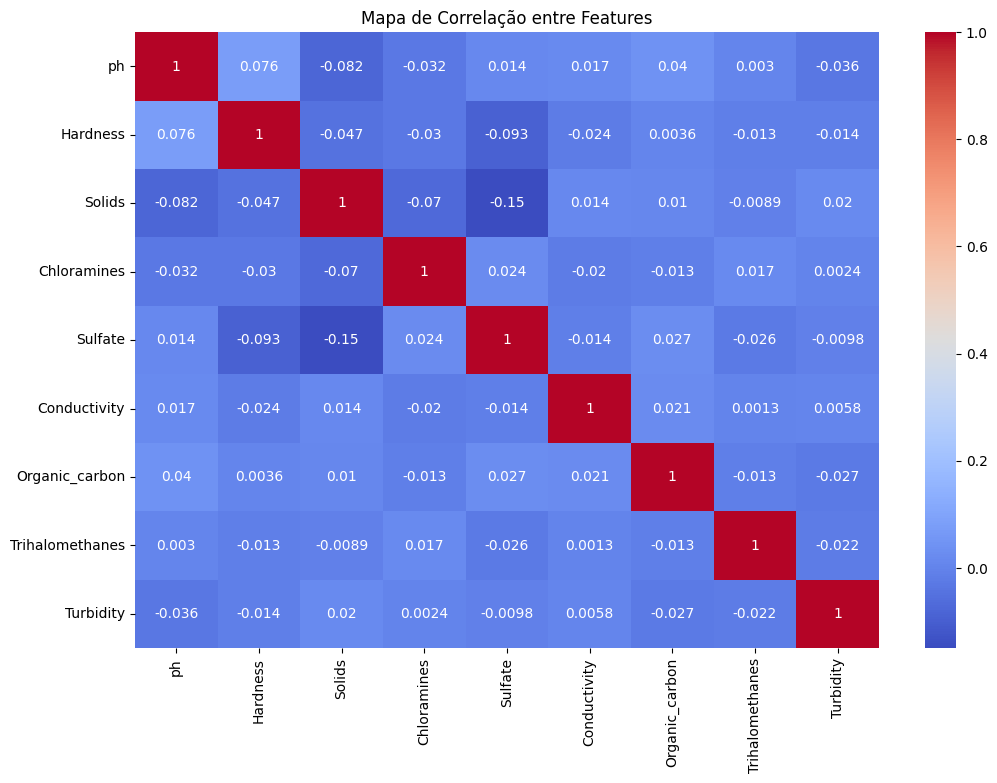

In [200]:
# Correlação entre as features
plt.figure(figsize=(12, 8))
sns.heatmap(X_norm.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Correlação entre Features')
plt.show()